# **Project 1**
**Basic Principles and Models**

Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a [boston dataset](https://openml.org/search?type=data&status=any&id=43465). Download it using the cell below:

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import tree
dataset = fetch_openml(name='Boston-house-price-data', version=1, parser="auto")
print('Setup completed')

Setup completed


## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 13
* Determine the median target value. 21.2
* How many participants have a target value greater than the median target value? 250

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the owner-occupied homes value in \$1000's below median or the owner-occupied homes value in \$1000's above median. **[0.5]**


np_target_new = np.array([0 if el < median_target else 1 for el in np_target])

df3 = pd.DataFrame(np_target_new,columns=['NEW_MEDV'])

df_new = pd.concat([df, df3], axis=1)

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.30, random_state=0)

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [ ]:
### YOUR CODE HERE ###
# print(dataset['data'])

# the feature dataframe
df1 = pd.DataFrame(np.array(dataset['data']),columns=dataset['feature_names'])
# the target dataframe
df2 = pd.DataFrame(np.array(dataset['target']),columns=dataset['target_names'])
# the feature+target dataframe
df = pd.concat([df1, df2], axis=1)

print('How many features do we have in this dataset? \nThe number of features is '+str(len(np.array(dataset['feature_names'])))+'.\n')
median_target = np.median(np.array(dataset['target']))
print('Determine the median target value: \nThe median target value is '+str(median_target)+'.\n')
np_target = np.array(dataset['target'])
print('How many participants have a target value greater than the median target value? \nThere are '+str(len(np_target[np_target>median_target]))+' participants.')

# add additional column for new target value
np_target_new = np.array([0 if el < median_target else 1 for el in np_target])
df3 = pd.DataFrame(np_target_new,columns=['NEW_MEDV'])
# the new df containing the new target column
df_new = pd.concat([df, df3], axis=1)
# split the dataset into training and testing
X_all = df_new.iloc[:,:-2].values
y_all = df_new.iloc[:,-2:].values
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.30, random_state=0)

# print(df_new)
# print(X_all)
# print(y_all)
# print(type(X_all))
# print(X_train.shape)
# print(X_test.shape)

How many features do we have in this dataset? 
The number of features is 13.

Determine the median target value: 
The median target value is 21.2.

How many participants have a target value greater than the median target value? 
There are 250 participants.


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the *proportion of owner-occupied units built prior to 1940* i.e. ``AGE``, the y-axis is the *weighted distances to five Boston employment centres* i.e. ``DIS``, and the color of each datapoint indicates its class.  **[0.5]** see plots below

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features.

What's different?
The magnitudes of the x and y axes in the two graphs are different.

**why do they look similar?**
Because standardization only shifts and scales the original distribution to mean = 0 and standard deviation = 1,
the shape of the distribution will be preserved, thus, the relationship between these two features remain the same.

Based on your observation, what is the advantage of standardization? **[0.6]**
Having different scales in the dataset can introduce significant bias to the machine learning model,
espacially for the distance-based models such as KNN, because model would assign more weights to the one with larger scale.
Standardization can reduce the bias caused by very different scales, resulting in more accurate machine learning model.

Text(0.5, 0.98, 'After standardization')

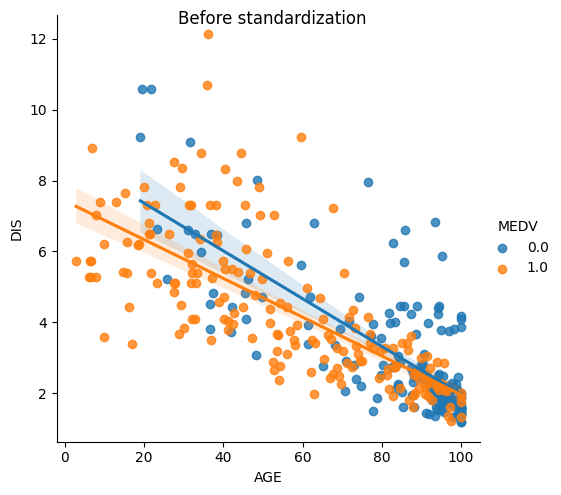

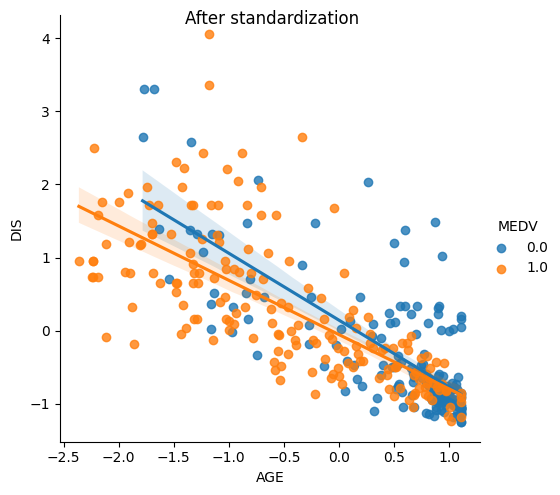

In [ ]:
### YOUR CODE HERE ###
df_age = pd.DataFrame(X_train[:,6], columns=['AGE'])
df_dis = pd.DataFrame(X_train[:,7], columns=['DIS'])
df_tar = pd.DataFrame(y_train[:,-1], columns=['MEDV'])
sns.lmplot(data=pd.concat([df_age, df_dis, df_tar], axis=1), x='AGE', y='DIS', hue='MEDV').fig.suptitle("Before standardization")

# plot again after standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) # standardize X_train for visualization

df_age = pd.DataFrame(X_train_std[:,6], columns=['AGE'])
df_dis = pd.DataFrame(X_train_std[:,7], columns=['DIS'])
sns.lmplot(data=pd.concat([df_age, df_dis, df_tar], axis=1), x='AGE', y='DIS', hue='MEDV').fig.suptitle("After standardization")

In [ ]:
print('What is different? \n'+'The magnitudes of the x and y axes in the two graphs are different. \n')
print('Why do they look similar? \n'+'Because standardization only shifts and scales the original distribution to mean = 0 and standard deviation = 1,\nthe shape of the distribution will be preserved, thus, the relationship between these two features remain the same.\n')
print('What is the advantage of standardization? \n'+'Having different scales in the dataset can introduce significant bias to the machine learning model,\nespacially for the distance-based models such as KNN, because model would assign more weights to the one with larger scale.\nStandardization can reduce the bias caused by very different scales, resulting in more accurate machine learning model.\n')

What is different? 
The magnitudes of the x and y axes in the two graphs are different. 

Why do they look similar? 
Because standardization only shifts and scales the original distribution to mean = 0 and standard deviation = 1,
the shape of the distribution will be preserved, thus, the relationship between these two features remain the same.

What is the advantage of standardization? 
Having different scales in the dataset can introduce significant bias to the machine learning model,
espacially for the distance-based models such as KNN, because model would assign more weights to the one with larger scale.
Standardization can reduce the bias caused by very different scales, resulting in more accurate machine learning model.



## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a house has the owner-occupied homes value that is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**

see the plot below

2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**

According to the validation scores plot (the blue line), the best k is 1, the highest cross-validation accuracy is 0.8023

3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**

Usually, high training score and low test score indicates over-fitting while low training score and low test score implies under-fitting,
therefore, overfitting occurring for values of k between 1 and 25, as well as between 40 and 60,
with underfitting observed in the range of k from 60 to 100



Train a KNN Classifier using cross-validation on the dataset. Sweep k from 1 to 100, and show a plot of the mean cross-validation accuracy vs k:


Text(0.5, 1.0, 'Scores vs. k value')

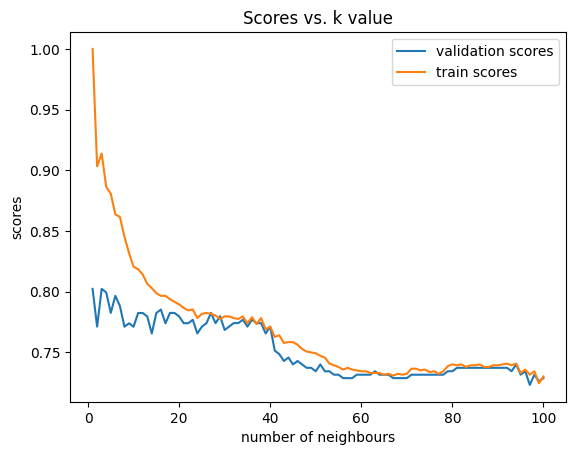

In [ ]:
### YOUR CODE HERE ###
def do_knn(k,X_train,y_train):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
  cv_accuracy = scores['test_score'].mean()
  tr_accuracy = scores['train_score'].mean()
  return cv_accuracy, tr_accuracy

cv_values = [] # the cross validation scores
tr_values = [] # the train scores
for i in range(100):
  cv_value, tr_value = do_knn(i+1,X_train,y_train[:,-1])
  cv_values.append(cv_value)
  tr_values.append(tr_value)

print('Train a KNN Classifier using cross-validation on the dataset. Sweep k from 1 to 100, and show a plot of the mean cross-validation accuracy vs k:')
plt.plot(list(np.arange(1,100+1)),cv_values,label='validation scores')
plt.plot(list(np.arange(1,100+1)),tr_values,label='train scores')
plt.xlabel('number of neighbours')
plt.ylabel('scores')
plt.legend()
plt.title('Scores vs. k value')

In [ ]:
print('What is the best k? What is the highest cross-validation accuracy? ')
print('According to the validation scores plot (the blue line), the best k is '+str(np.argmax(cv_values)+1)+', the highest cross-validation accuracy is '+str(round(cv_values[np.argmax(cv_values)],4))+'\n')
print('Comment on which ranges of k lead to underfitted or overfitted models:')
print('Usually, high training score and low test score indicates over-fitting while low training score and low test score implies under-fitting,\ntherefore, overfitting occurring for values of k between 1 and 25, as well as between 40 and 60,\nwith underfitting observed in the range of k from 60 to 100')

What is the best k? What is the highest cross-validation accuracy? 
According to the validation scores plot (the blue line), the best k is 1, the highest cross-validation accuracy is 0.8023

Comment on which ranges of k lead to underfitted or overfitted models:
Usually, high training score and low test score indicates over-fitting while low training score and low test score implies under-fitting,
therefore, overfitting occurring for values of k between 1 and 25, as well as between 40 and 60,
with underfitting observed in the range of k from 60 to 100


## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

see Feature_selector( ) below


* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

see plot below

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

see plot below

* State what is the number of essential features for classification and justify your answer. **[1]**
  
The number of essential features is 2 when the associated cv score is 0.8728 and k value is 6.
Based on the cv score vs. number of features plot, cv score is the highest when the number of features is 2.


You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
def do_knn(k,X_train,y_train):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
  cv_accuracy = scores['test_score'].mean()
  tr_accuracy = scores['train_score'].mean()
  return cv_accuracy, tr_accuracy

def get_full_feature_cv_score(X_train,y_train):
  cv_values = []
  for i in range(100):
    cv_value, tr_value = do_knn(i+1,X_train,y_train)
    cv_values.append(cv_value)
  return round(cv_values[np.argmax(cv_values)],4) # the best mean cv score for full features

def Feature_selector(X_train, y_train, tr=0.95):
  ### YOUR CODE HERE ###
  full_feature_cv_value = get_full_feature_cv_score(X_train,y_train) # get the best mean cv score for full features
  print('the full feature best cv score is '+str(full_feature_cv_value))
  checker = 1 # store the current best cv score
  best_cv_scores = []
  best_k_values = []
  removed_feature = []

  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train,y_train) # 1. fit dt
  importance = dt.feature_importances_ # 2. find importance order
  importance_copy = importance.copy()
  print('the full importance order is: \n'+str(importance_copy))

  while (checker >= tr*full_feature_cv_value):
    index_delete = np.argmin(importance) # find index of the least important feature
    deleted_val = importance[index_delete] # the deleted value
    importance = np.delete(importance, index_delete, 0) # update importance order
    X_train = np.delete(X_train, index_delete, 1) # 3. delete the least important feature column
    # stop when there is only one feature
    if X_train.shape[1] < 1:
      break
    removed_feature.append(np.where(importance_copy == deleted_val)[0]+1) # add the removed feature

    cv_values = []
    for i in range(100):
      cv_value,_ = do_knn(i+1,X_train,y_train) # 4. train knn model
      cv_values.append(cv_value)
    best_k_values.append(np.argmax(cv_values)+1) # 5. store best k and mean cv score
    best_cv_scores.append(round(cv_values[np.argmax(cv_values)],4))
    checker = best_cv_scores[-1]
  removed_feature = [el for sublist in removed_feature for el in sublist]

  return removed_feature, best_cv_scores, best_k_values

removed_feature, best_cv_scores, best_k_values = Feature_selector(X_train, y_train[:,-1], tr=0.95)
print('\n')
print('The list of removed feature:')
print(removed_feature)
print('The list of corresponding best cv scores when a feature is removed:')
print(best_cv_scores)
print('The list of corresponding best k values when a feature is removed:')
print(best_k_values)

the full feature best cv score is 0.8023
the full importance order is: 
[0.02531657 0.01130521 0.01080415 0.00904417 0.00942101 0.13149269
 0.06665282 0.07239412 0.01693282 0.02682939 0.02994804 0.01975182
 0.5701072 ]


The list of removed feature:
[4, 5, 3, 2, 9, 12, 1, 10, 11, 7, 8, 6]
The list of corresponding best cv scores when a feature is removed:
[0.8023, 0.8023, 0.808, 0.7911, 0.7882, 0.8052, 0.808, 0.8616, 0.8503, 0.8588, 0.8728, 0.8447]
The list of corresponding best k values when a feature is removed:
[3, 3, 3, 7, 5, 7, 7, 14, 11, 7, 6, 25]


Visualize your results by plotting the mean cross-validation accuracy (with a tuned k on y axis) vs. the on the number of features (x axis):


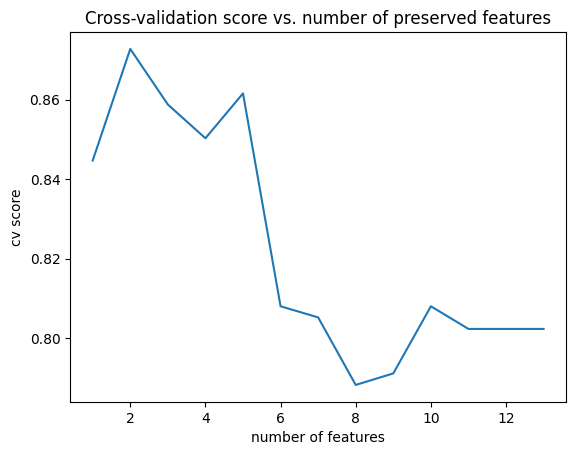

Plot the best value of k (y-axis) vs. the number of features:


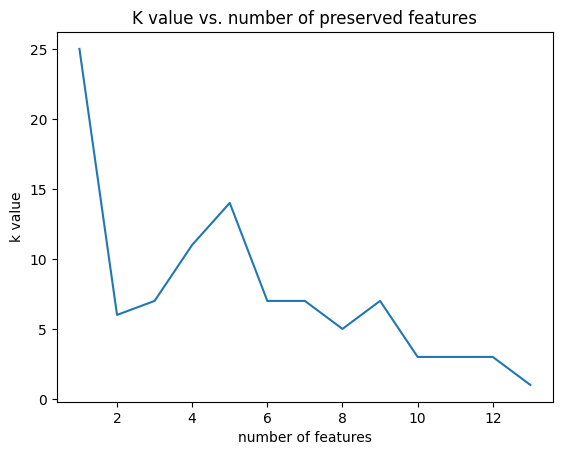

In [ ]:
# the full feature data (k=1, cv_score=0.8023) is added to the output lists
print('Visualize your results by plotting the mean cross-validation accuracy (with a tuned k on y axis) vs. the on the number of features (x axis):')
f1 = plt.figure()
plt.plot(list(np.arange(13,0,-1)),[0.8023]+best_cv_scores) # best cv score vs. number of features
plt.xlabel('number of features')
plt.ylabel('cv score')
plt.title('Cross-validation score vs. number of preserved features')
plt.show()
print('Plot the best value of k (y-axis) vs. the number of features:')
f2 = plt.figure()
plt.plot(list(np.arange(13,0,-1)),[1]+best_k_values) # best k value vs. number of features
plt.xlabel('number of features')
plt.ylabel('k value')
plt.title('K value vs. number of preserved features')
plt.show()

In [ ]:
print('State what is the number of essential features for classification and justify your answer:')
print('The number of essential features is '+str(np.arange(13,0,-1)[np.argmax(np.array([0.8023]+best_cv_scores))])+' when the associated cv score is '+str(np.array([0.8023]+best_cv_scores)[np.argmax(np.array([0.8023]+best_cv_scores))])+' and k value is '+str(np.array([1]+best_k_values)[np.argmax(np.array([0.8023]+best_cv_scores))])+'.')
print('Based on the cv score vs. number of features plot, cv score is the highest when the number of features is 2.')

State what is the number of essential features for classification and justify your answer:
The number of essential features is 2 when the associated cv score is 0.8728 and k value is 6.
Based on the cv score vs. number of features plot, cv score is the highest when the number of features is 2.


## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

X_train_std has been created in part 1. X_test_std will be created later in part 6.
The code for standardizing training data:
X_train_std = scaler.fit_transform(X_train);
The code for standardizing testing data:
X_test_std = scaler.transform(X_test)

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

see the plot below

3. Discuss how standardization affected your model and its performance?

From the cross-validation vs. number of features plot, most cv scores are higher after standardization, leading to better model performance.
Standardized data brings higher model accuracy.

In [ ]:
### YOUR CODE HERE ###
print('Standardize the training and test data:')
print('X_train_std has been created in part 1. X_test_std will be created later in part 6.')
print('The code for standardizing training data:')
print('X_train_std = scaler.fit_transform(X_train)')
print('The code for standardizing testing data:')
print('X_test_std = scaler.transform(X_test)')
cv_values = []
for i in range(100):
  cv_value,_ = do_knn(i+1,X_train_std,y_train[:,-1])
  cv_values.append(cv_value)
print('\n')
print('After standardization, in the full features case, the best k is '+str(np.argmax(cv_values)+1)+', the highest cross-validation accuracy is '+str(round(cv_values[np.argmax(cv_values)],4)))

Standardize the training and test data:
X_train_std has been created in part 1. X_test_std will be created later in part 6.
The code for standardizing training data:
X_train_std = scaler.fit_transform(X_train)
The code for standardizing testing data:
X_test_std = scaler.transform(X_test)


After standardization, in the full features case, the best k is 7, the highest cross-validation accuracy is 0.8758


the full feature best cv score is 0.8758
the full importance order is: 
[0.02531657 0.01130521 0.01080415 0.00904417 0.00942101 0.13149269
 0.06665282 0.07239412 0.01693282 0.02682939 0.02994804 0.01975182
 0.5701072 ]


The list of removed feature:
[4, 5, 3, 2, 9, 12, 1, 10, 11, 7, 8, 6]
The list of corresponding best cv scores when a feature is removed:
[0.8646, 0.8701, 0.8701, 0.873, 0.8701, 0.873, 0.8758, 0.873, 0.8561, 0.8616, 0.8616, 0.8447]
The list of corresponding best k values when a feature is removed:
[7, 5, 2, 6, 11, 4, 4, 28, 10, 14, 37, 25]


Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot:


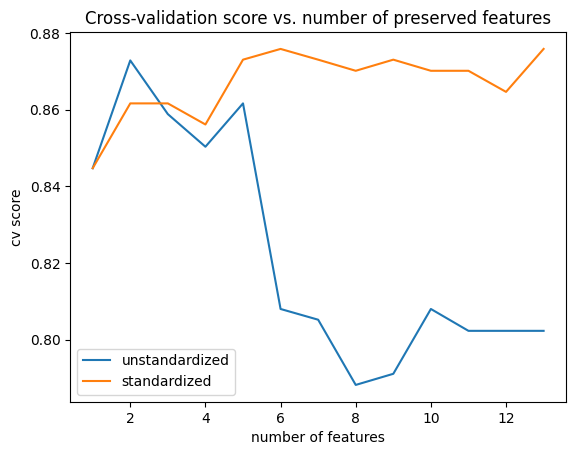

In [ ]:
removed_feature_std, best_cv_scores_std, best_k_values_std = Feature_selector(X_train_std, y_train[:,-1], tr=0.95)
print('\n')
print('The list of removed feature:')
print(removed_feature_std)
print('The list of corresponding best cv scores when a feature is removed:')
print(best_cv_scores_std)
print('The list of corresponding best k values when a feature is removed:')
print(best_k_values_std)
# similarly, the full feature data (k=7, cv_score=0.8758) is added to the output lists for the standardized case
print('\n')
print('Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot:')
f1 = plt.figure()
plt.plot(list(np.arange(13,0,-1)),[0.8023]+best_cv_scores,label='unstandardized') # best cv score vs. number of features
plt.plot(list(np.arange(13,0,-1)),[0.8758]+best_cv_scores_std,label='standardized') # best cv score vs. number of features after standardization
plt.xlabel('number of features')
plt.ylabel('cv score')
plt.title('Cross-validation score vs. number of preserved features')
plt.legend()

# f2 = plt.figure()
# plt.plot(list(np.arange(13,0,-1)),[1]+best_k_values,label='unstandardized') # best k value vs. number of features
# plt.plot(list(np.arange(13,0,-1)),[7]+best_k_values_std,label='standardized') # best k value vs. number of features after standardization
# plt.xlabel('number of features')
# plt.ylabel('k value')
# plt.title('K value vs. number of preserved features')
# plt.legend()
plt.show()

In [ ]:
print('Discuss how standardization affected your model and its performance:')
# print('After standardization, the number of essential features is '+str(np.arange(13,0,-1)[np.argmax(np.array([0.8758]+best_cv_scores_std))])+' when the associated cv score is '+str(np.array([0.8758]+best_cv_scores_std)[np.argmax(np.array([0.8758]+best_cv_scores_std))])+' and k value is '+str(np.array([7]+best_k_values_std)[np.argmax(np.array([0.8758]+best_cv_scores_std))])+'.')
print('From the cross-validation vs. number of features plot, most cv scores are higher after standardization, leading to better model performance.\nStandardized data brings higher model accuracy.')

Discuss how standardization affected your model and its performance:
From the cross-validation vs. number of features plot, most cv scores are higher after standardization, leading to better model performance.
Standardized data brings higher model accuracy.


## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.

The mean cv score of KNN model is 0.8758, which is higher than that of decision tree model (0.8503).
The KNN model outperforms the decision tree model based on their mean cross-validation score.

In [ ]:
### YOUR CODE HERE ###
tune_range = list(np.arange(2,21,1)) # I choose range from 2 to 20

dt_list = []
for i in range(len(tune_range)):
  depth = tune_range[i]
  for j in range(len(tune_range)):
    samples_split = tune_range[j]
    dt = tree.DecisionTreeClassifier(random_state=0,max_depth=depth,min_samples_split=samples_split)
    dt_cv_value = cross_val_score(dt,X_train_std,y_train[:,-1]).mean()
    dt_list.append([depth,samples_split,dt_cv_value])
dt_array = np.array(dt_list)
dt_ind = dt_array[:,-1].argmax()
print('The best max_depth is '+str(dt_array[dt_ind,0])+', the best min_samples_split is '+str(dt_array[dt_ind,1])+', the corresponding mean cv score is '+str(dt_array[dt_ind,-1]))

The best max_depth is 3.0, the best min_samples_split is 2.0, the corresponding mean cv score is 0.8503018108651912


In [ ]:
# for comparison, train a new knn using full feature with standardization
def do_knn(k,X_train,y_train):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
  cv_accuracy = scores['test_score'].mean()
  tr_accuracy = scores['train_score'].mean()
  return cv_accuracy, tr_accuracy

cv_values = [] # the cross validation scores
tr_values = [] # the train scores
for i in range(100):
  cv_value, tr_value = do_knn(i+1,X_train_std,y_train[:,-1]) # here use the standardized features
  cv_values.append(cv_value)
  tr_values.append(tr_value)
print('The best k is '+str(np.argmax(cv_values)+1)+', the highest cross-validation accuracy is '+str(round(cv_values[np.argmax(cv_values)],4))+'\n')

The best k is 7, the highest cross-validation accuracy is 0.8758



In [ ]:
print('Compare the decision tree performance (mean CV score) with KNN, both using all the features:')
print('The mean cv score of KNN model is 0.8758, which is higher than that of decision tree model (0.8503).\nThe KNN model outperforms the decision tree model based on their mean cross-validation score.')

Compare the decision tree performance (mean CV score) with KNN, both using all the features:
The mean cv score of KNN model is 0.8758, which is higher than that of decision tree model (0.8503).
The KNN model outperforms the decision tree model based on their mean cross-validation score.


In [ ]:
### extra: use the feature selector in which the decision tree is tuned

# def Feature_selector_tuned(X_train, y_train, tr=0.95):
#
#   full_feature_cv_value = get_full_feature_cv_score(X_train,y_train) # get the best mean cv score for full features
#   print('the full feature best cv score is '+str(full_feature_cv_value))
#   checker = 1 # store the current best cv score
#   best_cv_scores = []
#   best_k_values = []
#   removed_feature = []

#   dt = tree.DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_split=2) # apply the tunning parameters
#   dt.fit(X_train,y_train) # 1. fit dt
#   importance = dt.feature_importances_ # 2. find importance order
#   importance_copy = importance.copy()
#   print('the full importance order is: \n'+str(importance_copy))

#   while (checker >= tr*full_feature_cv_value):
#     index_delete = np.argmin(importance) # find index of the least important feature
#     deleted_val = importance[index_delete] # the deleted value
#     importance = np.delete(importance, index_delete, 0) # update importance order
#     X_train = np.delete(X_train, index_delete, 1) # 3. delete the least important feature column
#     if X_train.shape[1] < 1:
#       break
#     removed_feature.append(np.where(importance_copy == deleted_val)[0]+1) # add the removed feature

#     cv_values = []
#     for i in range(100):
#       cv_value,_ = do_knn(i+1,X_train,y_train) # 4. train knn model
#       cv_values.append(cv_value)
#     best_k_values.append(np.argmax(cv_values)+1) # 5. store best k and mean cv score
#     best_cv_scores.append(round(cv_values[np.argmax(cv_values)],4))
#     checker = best_cv_scores[-1]
#   removed_feature = [el for sublist in removed_feature for el in sublist]

#   return removed_feature[-12:], best_cv_scores, best_k_values

# removed_feature_tuned, best_cv_scores_tuned, best_k_values_tuned = Feature_selector_tuned(X_train_std, y_train[:,-1], tr=0.95)

# f1 = plt.figure()
# plt.plot(list(np.arange(13,0,-1)),[0.8758]+best_cv_scores_tuned,label='tuned (std)') # tuned, best cv score vs. number of features after standardization
# plt.plot(list(np.arange(13,0,-1)),[0.8758]+best_cv_scores_std,label='untuned (std)') # untuned, best cv score vs. number of features after standardization
# plt.xlabel('number of features')
# plt.ylabel('cv score')
# plt.legend()

# f2 = plt.figure()
# plt.plot(list(np.arange(13,0,-1)),[7]+best_k_values_tuned,label='tuned (std)') # tuned, best cv score vs. number of features after standardization
# plt.plot(list(np.arange(13,0,-1)),[7]+best_k_values_std,label='untuned (std)') # untuned, best cv score vs. number of features after standardization
# plt.xlabel('number of features')
# plt.ylabel('k value')
# plt.legend()
# plt.show()

# print('After standardization and tunning the decision tree, the number of essential features is '+str(np.arange(13,0,-1)[np.argmax(np.array([0.8758]+best_cv_scores_tuned))])+' when the associated cv score is '+str(np.array([0.8758]+best_cv_scores_tuned)[np.argmax(np.array([0.8758]+best_cv_scores_tuned))])+' and k value is '+str(np.array([7]+best_k_values_tuned)[np.argmax(np.array([0.8758]+best_cv_scores_tuned))])+'.')

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

Model 1 (cv score 0.8023): KNN without standardization, using k = 1, full features
The prediction accuracy for model 1 is 0.7236842105263158


Model 2 (cv score 0.8728): KNN with feature selection, without standardization, using k = 6, feature number 6 and 13
The prediction accuracy for model 2 is 0.8157894736842105


Model 3 (cv score 0.8758): KNN with feature selection and standardized, using k = 7, full features
The prediction accuracy for model 3 is 0.8289473684210527


Model 4 (cv score 0.8503): DT with standardized, full features
The prediction accuracy for model 4 is 0.7763157894736842


Model 5 (cv score 0.8758): KNN with standardized, using k = 7, full features
The prediction accuracy for model 5 is 0.8289473684210527

From the results above, it is obvious that the mean cross-validation score has a positive correlation with the model prediction accuracy.
The best model is the KNN model using k = 7 and full features. Standardization can effectively increase the model prediction accuracy.
It is recommended to try different machine learning algorithms when we are handling a certain task. For example, in this project,
the KNN model has better performance than the decision tree model.

In [ ]:
### YOUR CODE HERE ###
X_test_std = scaler.transform(X_test) # transform the testing data

print('Model 1 (cv score 0.8023): KNN without standardization, using k = 1, full features')
knn = KNeighborsClassifier(n_neighbors=1) # train the model using the above information
knn.fit(X_train,y_train[:,-1])
y_pred = knn.predict(X_test)
print('The prediction accuracy for model 1 is '+str(accuracy_score(y_test[:,-1], y_pred)))
print('\n')

print('Model 2 (cv score 0.8728): KNN with feature selection, without standardization, using k = 6, feature number 6 and 13')
knn = KNeighborsClassifier(n_neighbors=6) # train the model using the above information
knn.fit(X_train[:,[5,12]],y_train[:,-1])
y_pred = knn.predict(X_test[:,[5,12]])
print('The prediction accuracy for model 2 is '+str(accuracy_score(y_test[:,-1], y_pred)))
print('\n')

print('Model 3 (cv score 0.8758): KNN with feature selection and standardized, using k = 7, full features')
knn = KNeighborsClassifier(n_neighbors=7) # train the model using the above information
knn.fit(X_train_std,y_train[:,-1])
y_pred = knn.predict(X_test_std)
print('The prediction accuracy for model 3 is '+str(accuracy_score(y_test[:,-1], y_pred)))
print('\n')

print('Model 4 (cv score 0.8503): DT with standardized, full features')
dt = tree.DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_split=2) # train the model using the above information
dt.fit(X_train_std,y_train[:,-1])
y_pred = dt.predict(X_test_std)
print('The prediction accuracy for model 4 is '+str(accuracy_score(y_test[:,-1], y_pred)))
print('\n')

print('Model 5 (cv score 0.8758): KNN with standardized, using k = 7, full features')
knn = KNeighborsClassifier(n_neighbors=7) # train the model using the above information
knn.fit(X_train_std,y_train[:,-1])
y_pred = knn.predict(X_test_std)
print('The prediction accuracy for model 5 is '+str(accuracy_score(y_test[:,-1], y_pred)))

# print('Model 6 (cv score 0.8815): feature selection with standardized and tuned decision tree, using k = 7, feature number 4 to 13')
# knn = KNeighborsClassifier(n_neighbors=7) # train the model using the above information
# knn.fit(X_train_std[:,3:],y_train[:,-1])
# y_pred = knn.predict(X_test_std[:,3:])
# print('The prediction accuracy for model 6 is '+str(accuracy_score(y_test[:,-1], y_pred)))

Model 1 (cv score 0.8023): KNN without standardization, using k = 1, full features
The prediction accuracy for model 1 is 0.7236842105263158


Model 2 (cv score 0.8728): KNN with feature selection, without standardization, using k = 6, feature number 6 and 13
The prediction accuracy for model 2 is 0.8157894736842105


Model 3 (cv score 0.8758): KNN with feature selection and standardized, using k = 7, full features
The prediction accuracy for model 3 is 0.8289473684210527


Model 4 (cv score 0.8503): DT with standardized, full features
The prediction accuracy for model 4 is 0.7763157894736842


Model 5 (cv score 0.8758): KNN with standardized, using k = 7, full features
The prediction accuracy for model 5 is 0.8289473684210527


In [ ]:
print('Discuss your results:')
print('From the results above, it is obvious that the mean cross-validation score has a positive correlation with the model prediction accuracy.\nThe best model is the KNN model using k = 7 and full features. Standardization can effectively increase the model prediction accuracy.\nIt is recommended to try different machine learning algorithms when we are handling a certain task. For example, in this project,\nthe KNN model has better performance than the decision tree model.')

Discuss your results:
From the results above, it is obvious that the mean cross-validation score has a positive correlation with the model prediction accuracy.
The best model is the KNN model using k = 7 and full features. Standardization can effectively increase the model prediction accuracy.
It is recommended to try different machine learning algorithms when we are handling a certain task. For example, in this project,
the KNN model has better performance than the decision tree model.


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/